In [1]:
import os

from database import data_utils

import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import shapely.geometry

In [2]:
# Read KCM data
kcm_shape_data = pd.read_csv("../data/kcm_gtfs/shapes.txt")
kcm_shape_data = data_utils.get_consecutive_values(kcm_shape_data)

# Read Norway data, filter to only AtB (there are a lot of segments in the whole country)
nwy_shape_data = pd.read_csv("../data/nwy_gtfs/shapes.txt")
nwy_shape_data = nwy_shape_data[nwy_shape_data['shape_id'].apply(lambda x: x[:3]) == "ATB"]
nwy_shape_data = data_utils.get_consecutive_values(nwy_shape_data)

In [3]:
# For each unique line segment in the route shapes, get a lookup for the shape_ids that use that segment
kcm_lookup = data_utils.create_shape_segment_lookup(kcm_shape_data)
nwy_lookup = data_utils.create_shape_segment_lookup(nwy_shape_data)

<AxesSubplot: >

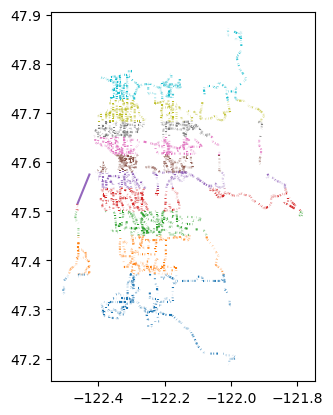

In [4]:
# Get line geometries, plot a sample
kcm_segments = data_utils.get_unique_line_geometries(kcm_shape_data)
kcm_segments.sample(10000).plot(column='segment_id')

<AxesSubplot: >

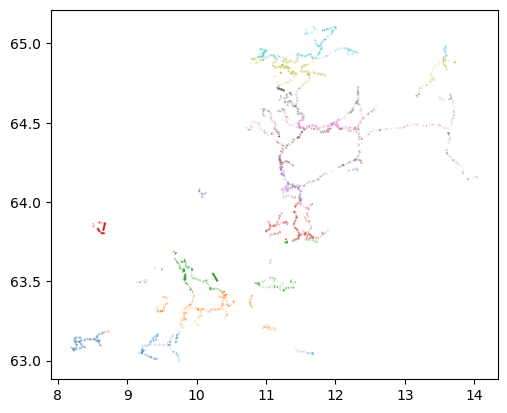

In [5]:
# Get line geometries, plot a sample
nwy_segments = data_utils.get_unique_line_geometries(nwy_shape_data)
nwy_segments.sample(10000).plot(column='segment_id')

In [6]:
# Save the exploded route network and lookup to file
outdir = "../data/processed_networks/"

# Save KCM
outfile = "kcm_segments"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(kcm_segments, f)
outfile = "kcm_lookup"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(kcm_lookup, f)

# Save Norway
outfile = "nwy_segments"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(nwy_segments, f)
outfile = "nwy_lookup"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(nwy_lookup, f)